# Задача 1
В цехах N1 и N2 предприятия производится продукт Y, который в дальнейшем используется в качестве исходного материала для производства изделий в цехе N3. Суммарная производительность цехов N1 и N2 зависит от вложения дополнительных средств X. При работе цехов N1 и N2 в течение одного месяца эта зависимость может быть приближенно представлена в виде функций: 
* N1: y=5+(x+40)^(2/3); 
* N2: y=7+(x+30)^(1/2); 

Функции остатка средств в течение месяца: 

* N1: **0.87**x;
* N2: **0.92**x. 

Средства, выделяемые на оба цеха в течение квартала **(3 месяца)**,составляют **137** единиц; перераспределение производится помесячно. Требуется распределить средства на планируемый квартал с целью получения максимального количества продукта Y.

In [70]:
# imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [71]:
# Константы условия
rem_1 = 0.87
rem_2 = 0.92
rem_max = rem_2
rem_min = rem_1
funds_num = 137
month_num = 3

def w(x, k, w_next):
  return 5 + (x + 40) ** (2/3) + 7 + ((k - x) + 30) ** (1/2) + w_next


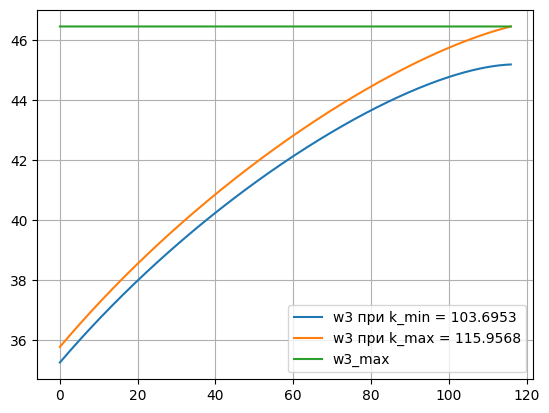


k3 = [103.6953, 115.9568];
w3 = 46.4508599030509;

103.6953 45.185338708606054
104.92145000000001 45.32847175505793
106.14760000000001 45.46704773833654
107.37375000000002 45.601476047941176
108.59990000000002 45.732108217268305
109.82605000000002 45.8592487619655
111.05220000000003 45.98316353962332
112.27835000000003 46.104086290311805
113.50450000000004 46.222223819603315
114.73065000000004 46.33776015334806


In [72]:
# Шаг 3
k_min = rem_min ** 2 * funds_num
k_max = rem_max ** 2 * funds_num

x3 = np.arange(0, k_max + 0.001, 0.001)

w_min = w(x3, k_min, 0)
w_max = w(x3, k_max, 0)

w3 = max(max(w_min), max(w_max))

plt.plot(x3, w_min)
plt.plot(x3, w_max)
plt.plot(x3, [w3] * len(x3))
plt.legend((f'w3 при k_min = {k_min}', f'w3 при k_max = {k_max}', 'w3_max'))
plt.grid()
plt.show()

print(f'''
k3 = [{k_min}, {k_max}];
w3 = {w3};
''')

k_range = np.arange(k_min, k_max, (k_max - k_min) / 10)
for k in k_range:
  print(k, max(w(x3, k, 0)))

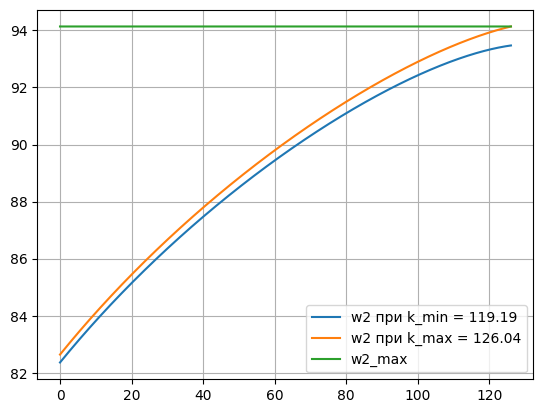


k2 = [119.19, 126.04];
w2 = 94.13749578401979;

119.19 93.47170226629552
119.875 93.5423692805108
120.56 93.61202788299929
121.245 93.68072004975404
121.93 93.7484849229977
122.61500000000001 93.81535907199097
123.30000000000001 93.8813767237676
123.98500000000001 93.94656996792847
124.67000000000002 94.01096893897264
125.35500000000002 94.07460197910552


In [73]:
# Шаг 2
k_min = rem_min ** 1 * funds_num
k_max = rem_max ** 1 * funds_num

x2 = np.arange(0, k_max + 0.001, 0.001)

w_min = w(x2, k_min, w3)
w_max = w(x2, k_max, w3)

w2 = max(max(w_min), max(w_max))

plt.plot(x2, w_min)
plt.plot(x2, w_max)
plt.plot(x2, [w2] * len(x2))
plt.legend((f'w2 при k_min = {k_min}', f'w2 при k_max = {k_max}', 'w2_max'))
plt.grid()
plt.show()

print(f'''
k2 = [{k_min}, {k_max}];
w2 = {w2};
''')

k_range = np.arange(k_min, k_max, (k_max - k_min) / 10)
for k in k_range:
  print(k, max(w(x2, k, w3)))

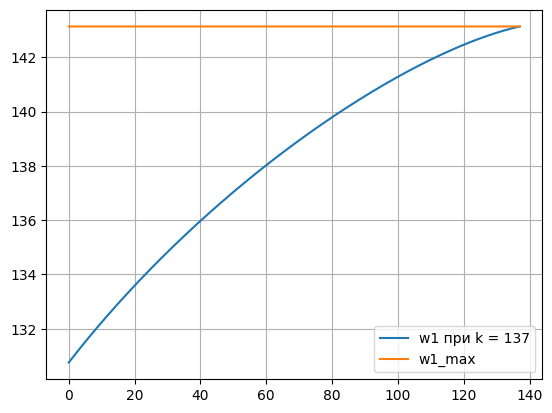


k1 = 137;
w1 = 143.13926760824472;

137 143.13926760824472


In [74]:
# Шаг 1
k = funds_num

x1 = np.arange(0, k + 0.001, 0.001)

w1 = max(w(x1, k, w2))

plt.plot(x1, w(x1, k, w2))
plt.plot(x1, [w1] * len(x1))
plt.legend((f'w1 при k = {k}', 'w1_max'))
plt.grid()
plt.show()

print(f'''
k1 = {k};
w1 = {w1};
''')

print(k, max(w(x1, k, w2)))

In [76]:
# Прямая перегонка решения
x1_1 = x1[np.argmax(w(x1, k, w2))]
x1_2 = funds_num - x1_1
k_1 = x1_1 * rem_1 + x1_2 * rem_2
print(k_1)

x2_1 = x2[np.argmax(w(x2, k_1, w3))]
x2_2 = funds_num - x2_1
k_2 = x2_1 * rem_1 + x2_2 * rem_2
print(k_2)

x3_1 = x3[np.argmax(w(x3, k_2, 0))]
x3_2 = funds_num - x3_1
k_3 = x3_1 * rem_1 + x3_2 * rem_2

d = {'1-ый': [x1_1, x1_2], '2-ой': [x2_1, x2_2], '3-ий': [x3_1, x3_2]}
df = pd.DataFrame(data=d)
df.index = ['I цех', 'II цех']

print(df)
print(f'''
Максимальная производительность за месяц: {w1}
Остаток средств на конец месяца: {k_3}
''')

119.19
119.73795
         1-ый     2-ой     3-ий
I цех   137.0  126.041  115.957
II цех    0.0   10.959   21.043

Максимальная производительность за месяц: 143.13926760824472
Остаток средств на конец месяца: 120.24215000000001

